In [1]:
metadata_path = "../data/db2/MFD_metadatas.csv"
max_days = 365 * 30

In [2]:
from mandrillage.dataset import read_dataset, MandrillImageDataset, compute_age
import numpy as np
import pandas as pd

data = pd.read_csv(
    metadata_path,
    dtype={
        "ShootDate": str,
        "shootdate": str,
        "Shootdate": str,
        "dob": str,
    },
)
# All columns to lowercase
data.columns = data.columns.str.lower()

data = data.drop("pos_pic", axis=1)

data["shootdate"].replace("nan", np.nan, inplace=True)
data["shootdate"].replace("#N/D", np.nan, inplace=True)
data["dob"].replace("#N/D", np.nan, inplace=True)
# data["shootdate"].replace("", np.nan, inplace=True)
len_raw = len(data)
data = data.dropna()

data["age"] = data.apply(compute_age, axis=1)

/home/rkarpins/miniconda3/envs/mar/lib/python3.9/site-packages/albumentations/augmentations/transforms.py:1284: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


In [3]:
def split_by_certainty(data):
    # Filter eventual errors
    data = data[data["age"] >= 0]

    # Get all data that is certain with dob error == 0
    certain = data[data["error_dob"] == 0]
    
    # uncertain
    uncertain = data[data["error_dob"] > 0]
    
    # unknown certainty
    unknown = data[data["error_dob"] == -1]
    
    return certain, uncertain, unknown

In [23]:
male_data = data[data["sex"] == "m"]
female_data = data[data["sex"] == "f"]

def display_data(data, bins=30*4):
    certain, uncertain, unknown = split_by_certainty(data)
    
    all_data = pd.DataFrame({"certain": certain["age"],
                             "uncertain": uncertain["age"], 
                             "uncertain 365": uncertain[uncertain["error_dob"] <= 400]["age"],
                             "unknown": unknown["age"]})
    all_data.hist(bins=bins)

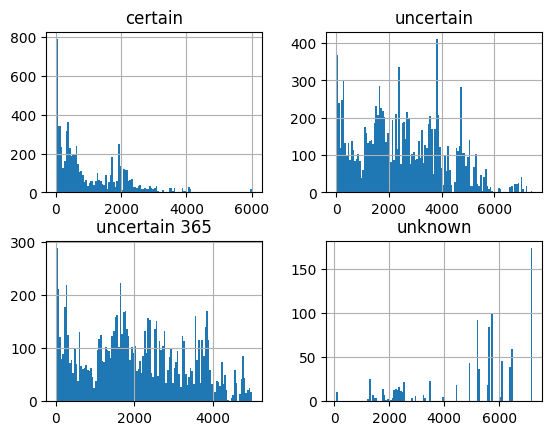

In [24]:
display_data(male_data)

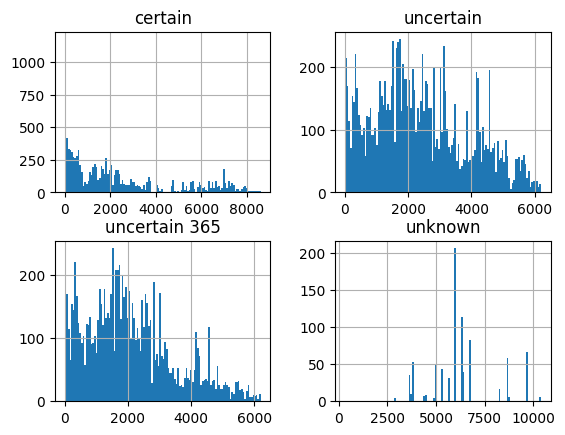

In [25]:
display_data(female_data)